In [217]:
from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pickle

In [218]:
# target = "target_close"
# target = "close_percent_change_1"
target = "up_down_close_1"

In [219]:
df = pd.read_parquet("../data/dataset.parquet")

In [220]:
def normalize_column(data: pd.DataFrame, column: str | list) -> pd.DataFrame:
    if isinstance(column, str):
        data[column] = (data[column] - data[column].min()) / (data[column].max() - data[column].min())
    elif isinstance(column, list):
        for col in column:
            data[col] = (data[col] - data[col].min()) / (data[col].max() - data[col].min())
    return data

In [221]:
def normalize_series(data: pd.Series) -> pd.Series:
    return (data - data.min()) / (data.max() - data.min())

In [222]:
df.filter(like="splits")

,splits_event_value,splits_event_name,splits_event_sentiment,splits_event_decay,is_nan_splits_event_value,is_nan_splits_event_sentiment
0,0.0,None,0.0,NaN,0,0
1,0.0,None,0.0,NaN,0,0
2,0.0,None,0.0,NaN,0,0
3,0.0,None,0.0,NaN,0,0
4,0.0,None,0.0,NaN,0,0
...,...,...,...,...,...,...
5027,4.0,splits,1.0,4.537077e-23,1,1
5028,4.0,splits,1.0,4.310223e-23,1,1
5029,4.0,splits,1.0,4.094712e-23,1,1
5030,4.0,splits,1.0,3.889976e-23,1,1


In [223]:
# columns to drop "dividends"
df = df.drop(columns=["dividends_event_name", "splits_event_name"])


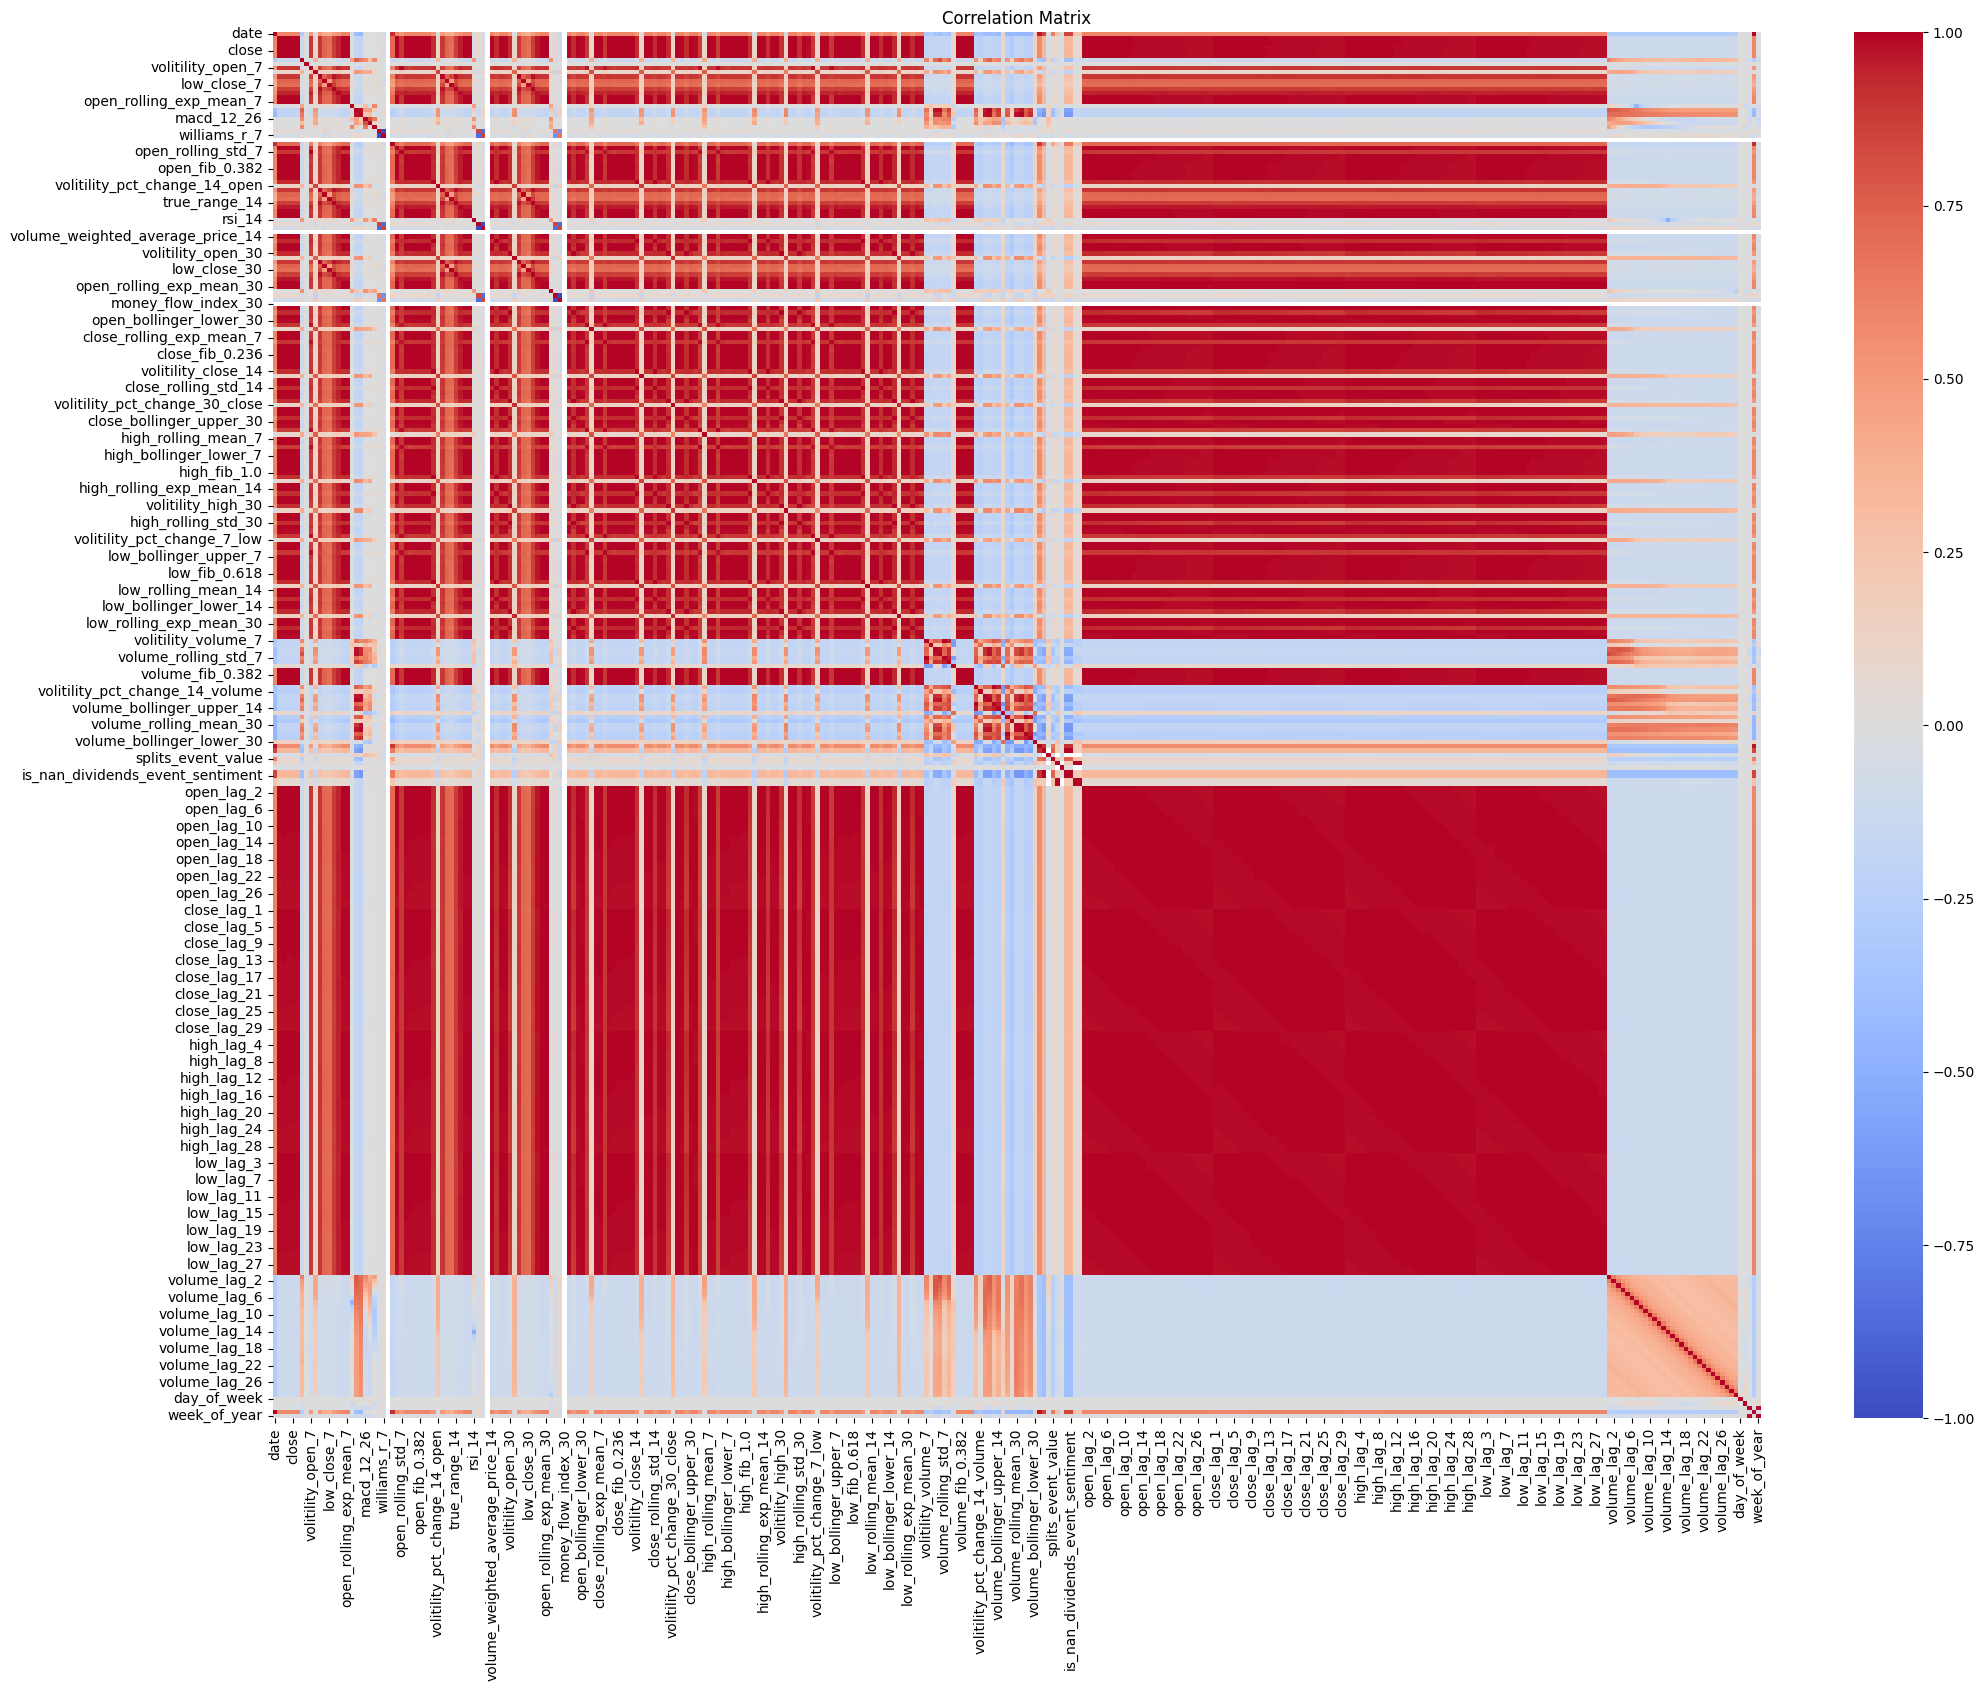

In [224]:
# Matplotlib Graphs
plt.figure(figsize=(24, 18))

# Correlation Matrix
corrilations = df.corr()
sns.heatmap(corrilations, annot=False, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [225]:
list(df.columns)

['date',
 'open',
 'high',
 'low',
 'close',
 'adj close',
 'volume',
 'up_down_close_1',
 'volitility_open_7',
 'volitility_pct_change_7_open',
 'high_low_7',
 'high_close_7',
 'low_close_7',
 'true_range_7',
 'average_true_range_7',
 'open_rolling_mean_7',
 'open_rolling_exp_mean_7',
 'rsi_7',
 'short_ema_12',
 'long_ema_26',
 'macd_12_26',
 'signal_9',
 'macd_hist_12_26_9',
 'stochastic_oscillator_7',
 'williams_r_7',
 'money_flow_index_7',
 'on_balance_volume_1',
 'volume_weighted_average_price_7',
 'open_rolling_std_7',
 'open_bollinger_upper_7',
 'open_bollinger_lower_7',
 'open_fib_0.236',
 'open_fib_0.382',
 'open_fib_0.618',
 'open_fib_1.0',
 'volitility_open_14',
 'volitility_pct_change_14_open',
 'high_low_14',
 'high_close_14',
 'low_close_14',
 'true_range_14',
 'average_true_range_14',
 'open_rolling_mean_14',
 'open_rolling_exp_mean_14',
 'rsi_14',
 'stochastic_oscillator_14',
 'williams_r_14',
 'money_flow_index_14',
 'volume_weighted_average_price_14',
 'open_rolling_s

In [226]:
df.filter(like="close_fib")

,close_fib_0.236,close_fib_0.382,close_fib_0.618,close_fib_1.0
0,0.108255,0.107331,0.105836,0.103417
1,0.105027,0.104528,0.103722,0.102417
2,0.112370,0.110898,0.108519,0.104667
3,0.116142,0.115096,0.113404,0.110667
4,0.120673,0.119955,0.118795,0.116917
...,...,...,...,...
5027,127.944477,127.167757,125.912237,123.879997
5028,126.987161,126.156421,124.813580,122.639999
5029,122.608080,121.480960,119.659040,116.709999
5030,120.680920,120.019540,118.950461,117.220001


In [227]:
df = normalize_column(df, ["rsi_30"])

In [228]:
df["line_0.7"] = 0.7
df["line_0.5"] = 0.5
df["line_0.3"] = 0.3

In [229]:
# only the last 365 days
df = df.iloc[-720:]

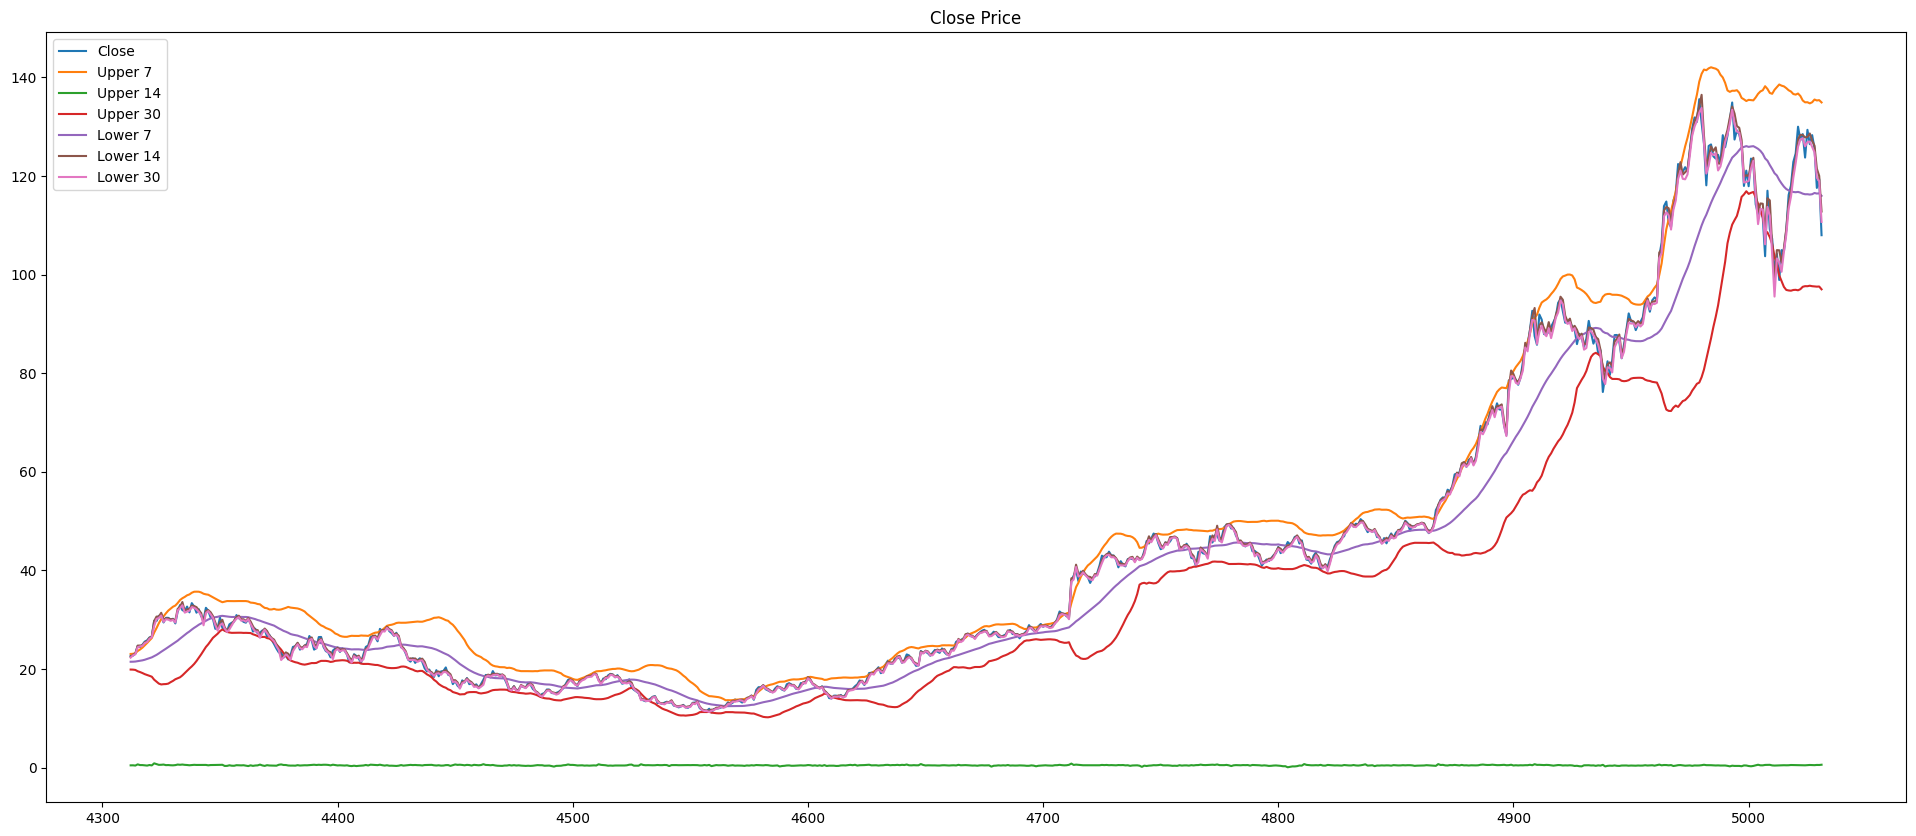

In [230]:
# More Graphs
plt.figure(figsize=(24, 10))
plt.plot(df["close"])
# plt.plot(df["close_bollinger_upper_7"])
# plt.plot(df["close_bollinger_upper_14"])
plt.plot(df["close_bollinger_upper_30"])
# plt.plot(df["close_bollinger_lower_7"])
# plt.plot(df["close_bollinger_lower_14"])


plt.plot(df["rsi_30"])
plt.plot(df["close_bollinger_lower_30"])
plt.plot(df["close_rolling_mean_30"])

plt.plot(df["close_fib_0.382"])
plt.plot(df["close_fib_0.618"])


plt.title("Close Price")
plt.legend(["Close", "Upper 7", "Upper 14", "Upper 30", "Lower 7", "Lower 14", "Lower 30"])
plt.show()


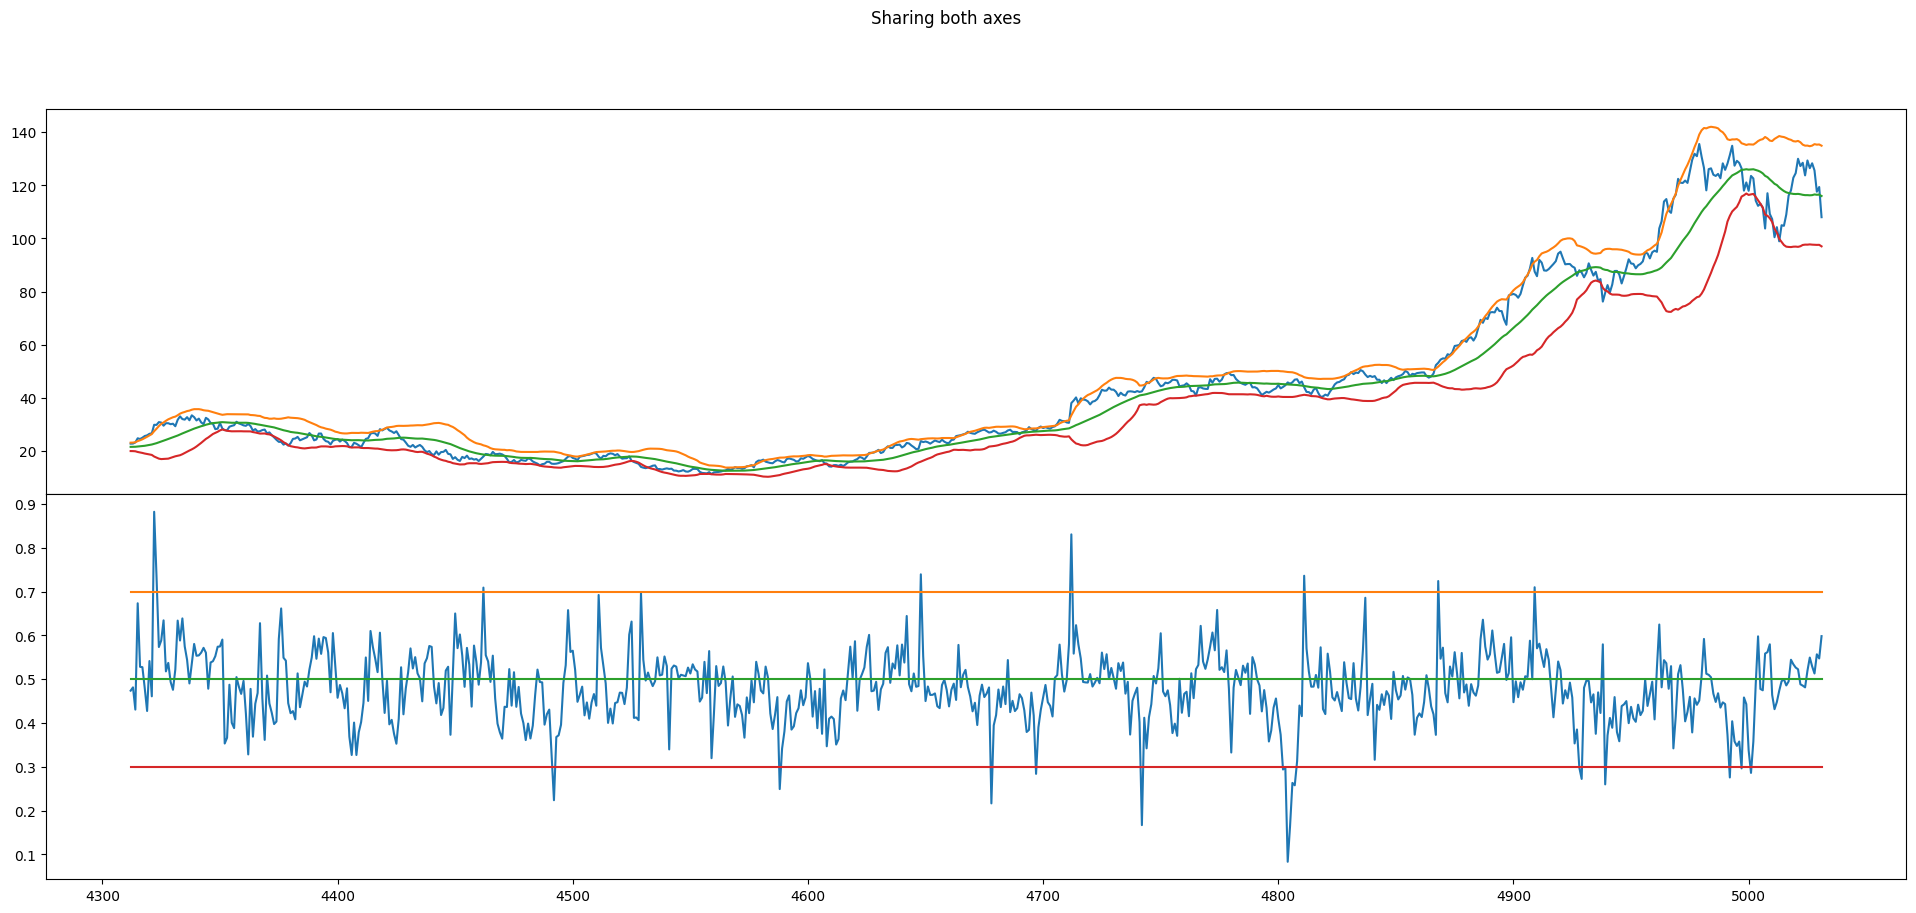

In [231]:
fig = plt.figure(figsize=(24, 10))
gs = fig.add_gridspec(2, hspace=0)
axs = gs.subplots(sharex=True, sharey=False)
fig.suptitle('Sharing both axes')

axs[0].plot(df["close"])
axs[0].plot(df["close_bollinger_upper_30"])
axs[0].plot(df["close_rolling_mean_30"])
axs[0].plot(df["close_bollinger_lower_30"])

axs[1].plot(df["rsi_30"])
axs[1].plot(df["line_0.7"])
axs[1].plot(df["line_0.5"])
axs[1].plot(df["line_0.3"])